In [1]:
import pandas as pd
import numpy as np
import re
import nltk

In [25]:
train  = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\LeaveOneOut\leave_reddit.csv')
test = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\UniformClasses\Clean\reddit.csv')

In [26]:
train.dropna(inplace=True)
# indices_to_keep_train = ~train.isin([np.nan, np.inf, -np.inf]).any(1)
# train = train[indices_to_keep_train].astype(np.float64)

In [27]:
test.dropna(inplace=True)
# indices_to_keep_test = ~test.isin([np.nan, np.inf, -np.inf]).any(1)
# test = test[indices_to_keep_test].astype(np.float64)

In [28]:
train = train[['Text','Class']]
train

,Text,Class
0,rt mayasolov woman shouldnt complain clean ho...,NOT
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,OFF
2,rt urkindofbrand dawg rt ever fuck bitch sta...,OFF
3,rt cganderson vivabas look like tranni,OFF
4,rt shenikarobert shit hear might true might f...,OFF
...,...,...
78758,\t\tim logic care heart love eisenhow gop hat...,NOT
78759,\t\t\tye oper wetback effici remov illeg,NOT
78761,\thalf nigger pig fuck globalist piec shit,NOT
78764,\ti routin suspend say fuck ban call promin l...,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

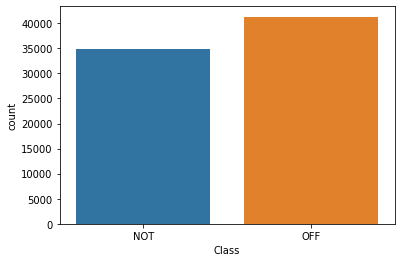

In [29]:
import seaborn as sns
sns.countplot('Class',data=train)

In [30]:
test = test[['Text','Class']]
test

,Text,Class
0,yall hear sumn mean live small town rn work...,OFF
1,japanes arent retard know fiction charact are...,OFF
2,fuck women get entitl attitud deserv everyth...,OFF
3,listen word articl aka hit piec entir word wa...,OFF
4,hate see inexperienc cop work man love watch ...,NOT
...,...,...
11664,\t\tuntil day shit brother son father uncl ru...,NOT
11665,\t\t\tshe wont video evid shes crazi yall n...,NOT
11666,\t\t\t\tno wasnt video evid famili poor kid ...,NOT
11667,\t\t\t\twoman crazi women unit,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

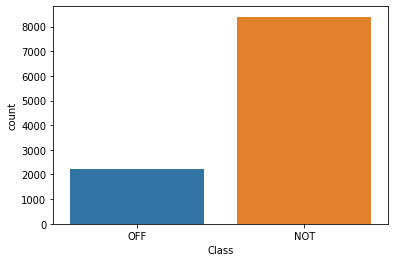

In [31]:
sns.countplot('Class',data=test)

In [20]:
# text = data['Text']
# label = data['Class']

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(text, label, random_state=42)
# print(len(x_train), len(y_train))
# print(len(x_test), len(y_test))

In [32]:
x_train = train['Text']
y_train = train['Class']
x_test = test['Text']
y_test = test['Class']

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

76205 76205
10604 10604


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform((x_train).values.astype('str'))


In [ ]:
x_test_vectorizer=count.transform(x_test.values.astype('str'))
# x_train_vectorizer.toarray()

In [ ]:
count.vocabulary_

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

# x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

In [ ]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=True,
        eval_metric='auc')

In [ ]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

In [ ]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

In [33]:
# SVM
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,
    max_iter=5, tol=None)),
])

In [34]:
text_clf.fit(x_train, y_train)
predicted = text_clf.predict(x_test)
np.mean(predicted == y_test)

0.7268955111278763

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
target_names=['NOT','OFF']))

metrics.confusion_matrix(y_test, predicted)



              precision    recall  f1-score   support

         NOT       0.85      0.80      0.82      8398
         OFF       0.37      0.46      0.41      2206

    accuracy                           0.73     10604
   macro avg       0.61      0.63      0.62     10604
weighted avg       0.75      0.73      0.74     10604



array([[6689, 1709],
       [1187, 1019]], dtype=int64)

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [ ]:
x_train = x_train.astype('str')

In [ ]:
print(x_train.dtype)

In [ ]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
y_train = y_train.astype('str')

In [ ]:
print(y_train.dtype)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['OFF', 'NOT'])
le.classes_
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
# history=model.fit(sequences_matrix,y_train_encoded,batch_size=1024,epochs=10,
#           validation_split=0.2,callbacks=[stop,checkpoint])

In [ ]:
x_test = x_test.astype('str')

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
# accr = model.evaluate(test_sequences_matrix,y_test_encoded)

In [ ]:
# lstm_prediction=model.predict(test_sequences_matrix)

In [ ]:
# lstm_pred = []
# for val in lstm_prediction:
#     if val >= 0.8:
#         lstm_pred.append(0)
#     elif val <0.8:
#         lstm_pred.append(1)

In [ ]:
# print(confusion_matrix(y_test_encoded,lstm_prediction))

In [ ]:
# print (classification_report(y_test_encoded, lstm_prediction))